# Setup libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler ,StandardScaler ,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif, chi2,SelectFromModel,RFE
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline


In [7]:
data=pd.read_csv("file/train_df.csv")
df=pd.DataFrame(data)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,0,0,66,1,1,61.15,4017.45,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,1,0,0,0,65,1,1,84.85,5459.20,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0,0,1,1,72,1,0,20.35,1354.40,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0,0,1,1,68,1,1,72.95,4953.25,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0,0,1,1,12,0,0,35.50,432.25,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,0,0,0,0,63,1,0,104.50,6590.80,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4221,0,0,0,0,1,1,0,51.25,51.25,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4222,1,0,1,0,71,1,0,109.25,7707.70,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4223,1,0,1,0,24,1,0,20.40,482.80,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Heat Map 


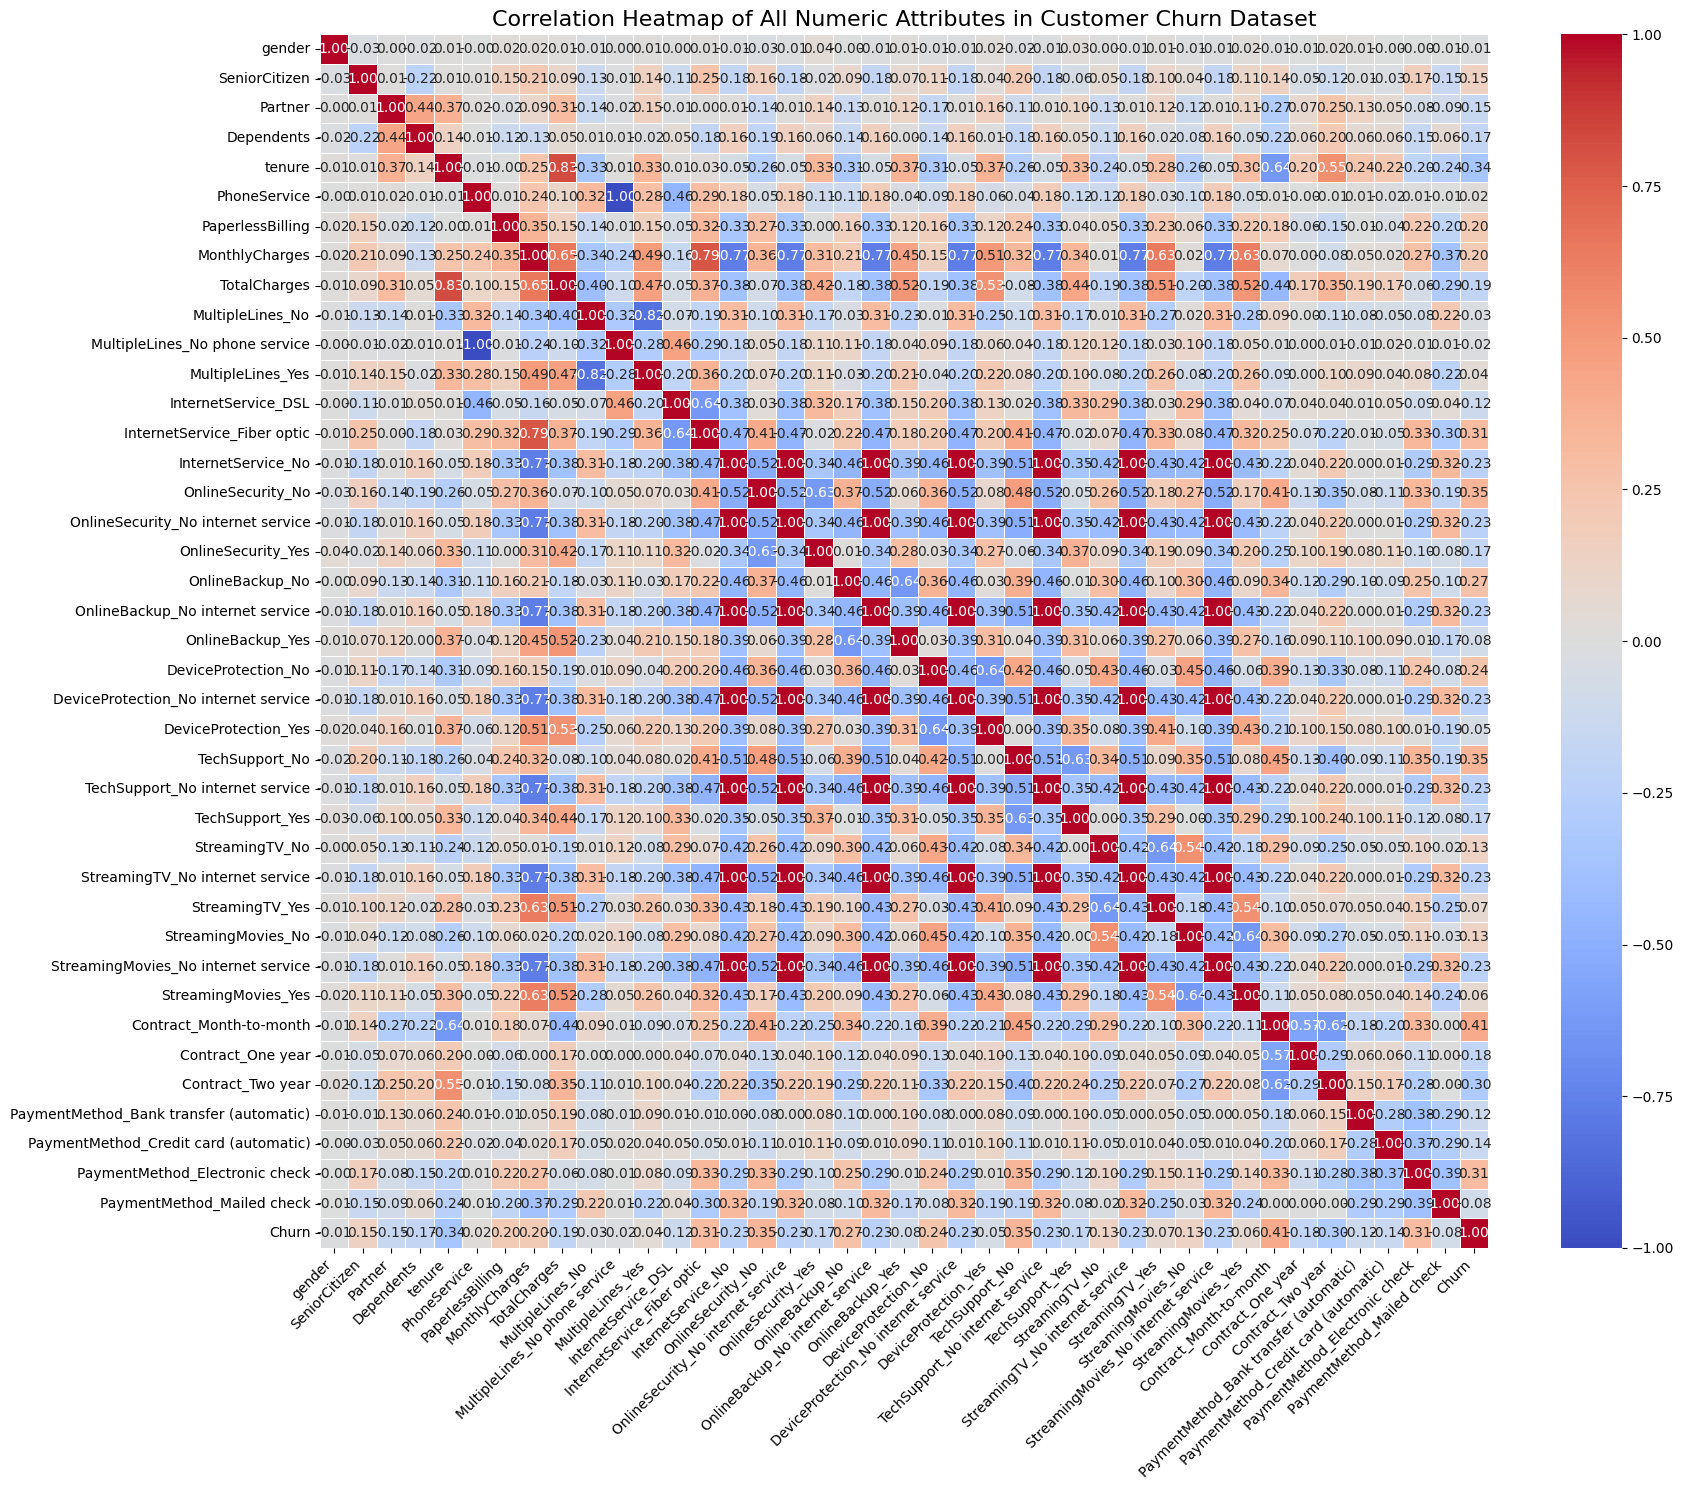

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(18, 15))  
sns.heatmap(corr_matrix,
            annot=True,           
            fmt=".2f",            
            cmap='coolwarm',     
            linewidths=0.5,       
            annot_kws={"size": 10})  

plt.title('Correlation Heatmap of All Numeric Attributes in Customer Churn Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                 
plt.show()


# Feature Selection

## Scaling

In [ ]:
scaler = StandardScaler()
mmscaler = MinMaxScaler()


## Hyperparameter Tuning Random Forest

In [ ]:

pipe = Pipeline([('classifier', RandomForestClassifier(random_state=42))])
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf' : [1, 2, 5, 10],
    'classifier__min_samples_split' : [2, 5, 10, 15, 100],
    'classifier__criterion' : ['gini', 'entropy']
}

search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
outer_cv = KFold(n_splits=5)
nested_score = cross_val_score(search, X, y, cv=outer_cv)
search.fit(X, y)

print("Best parameters found:")
print(search.best_params_)
print(f"\nBest cross-validation accuracy: {search.best_score_:.4f}")
print("Nested CV Score: ", nested_score.mean())

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 15, 'classifier__n_estimators': 200}

Best cross-validation accuracy: 0.8050
Nested CV Score:  0.7997633136094674


## Filter Methods | f_classif

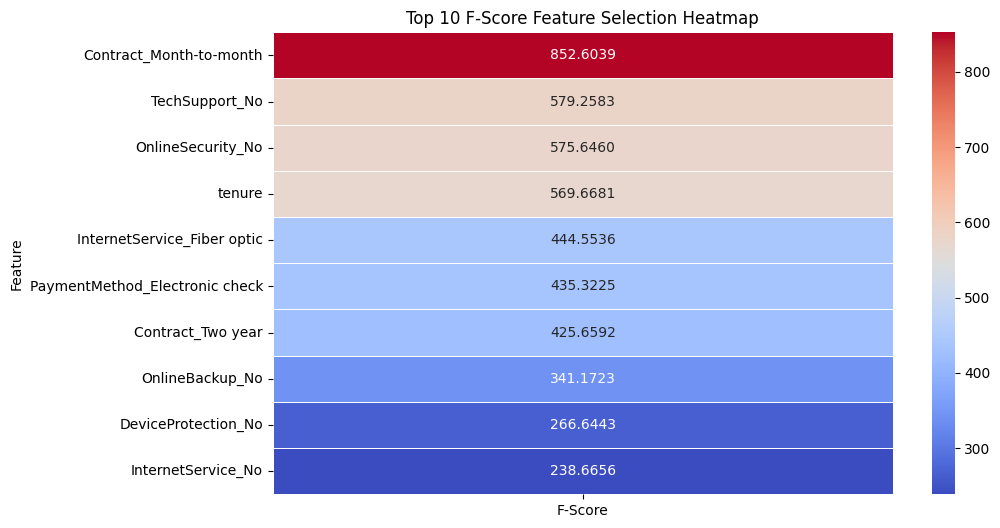

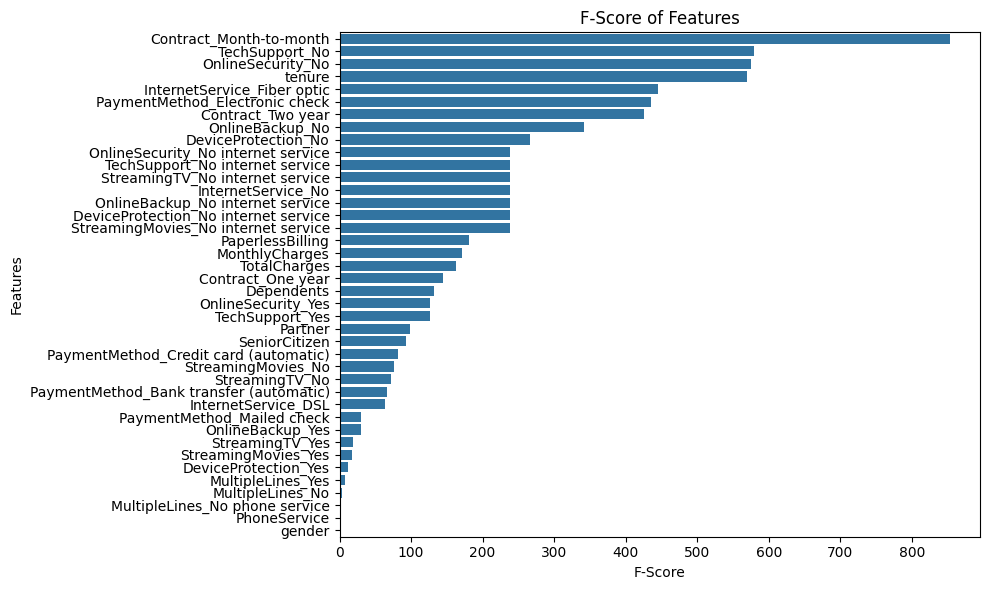

In [ ]:
X_scaled = scaler.fit_transform(X)
f_score, p_value = f_classif(X_scaled, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_score, 'P-Value': p_value})
feature_scores.set_index('Feature', inplace=True)
top_10_features = feature_scores.nlargest(10, 'F-Score')

plt.figure(figsize=(10, 6))
sns.heatmap(top_10_features[['F-Score']], annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Top 10 F-Score Feature Selection Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=feature_scores.sort_values(by='F-Score', ascending=False))
plt.title('F-Score of Features')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Filter Methods | Chi-square test

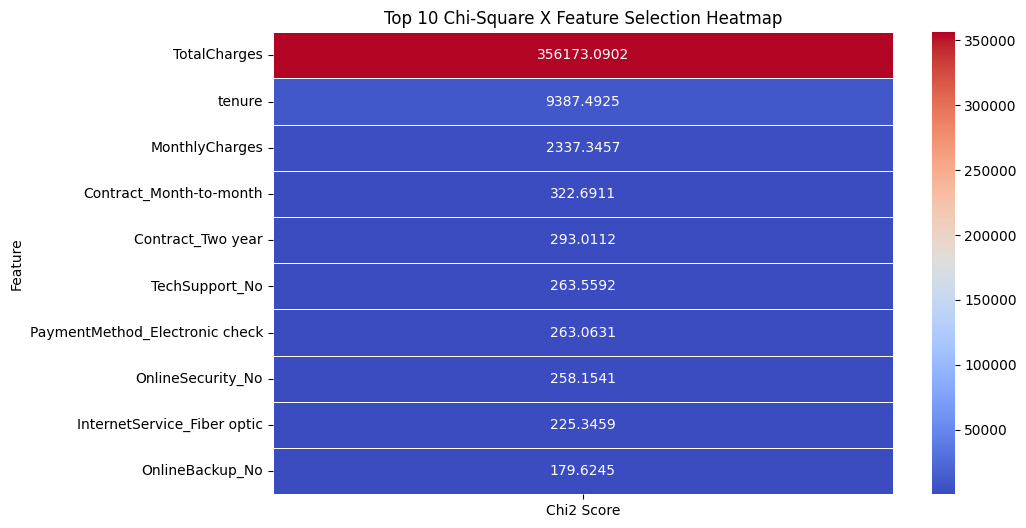

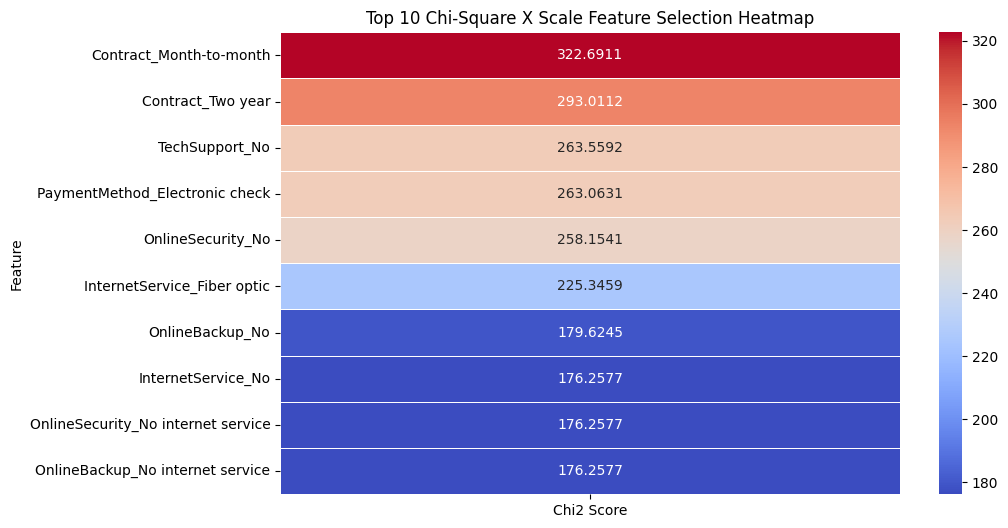

In [ ]:
X_scaled = mmscaler.fit_transform(X)
#chi2 X
chi_scores, p_values = chi2(X, y)
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'P-Value': p_values})
chi2_results.set_index('Feature', inplace=True)
chi1_top_10_features = chi2_results.nlargest(10, 'Chi2 Score')

plt.figure(figsize=(10, 6))
sns.heatmap(chi1_top_10_features[['Chi2 Score']], annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Top 10 Chi-Square X Feature Selection Heatmap')
plt.show()

#chi2 X_scaled
chi_scores, p_values = chi2(X_scaled, y)
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores, 'P-Value': p_values})
chi2_results.set_index('Feature', inplace=True)
chi2_top_10_features = chi2_results.nlargest(10, 'Chi2 Score')

plt.figure(figsize=(10, 6))
sns.heatmap(chi2_top_10_features[['Chi2 Score']], annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Top 10 Chi-Square X Scale Feature Selection Heatmap')
plt.show()

## Embedded Methods | Random forest

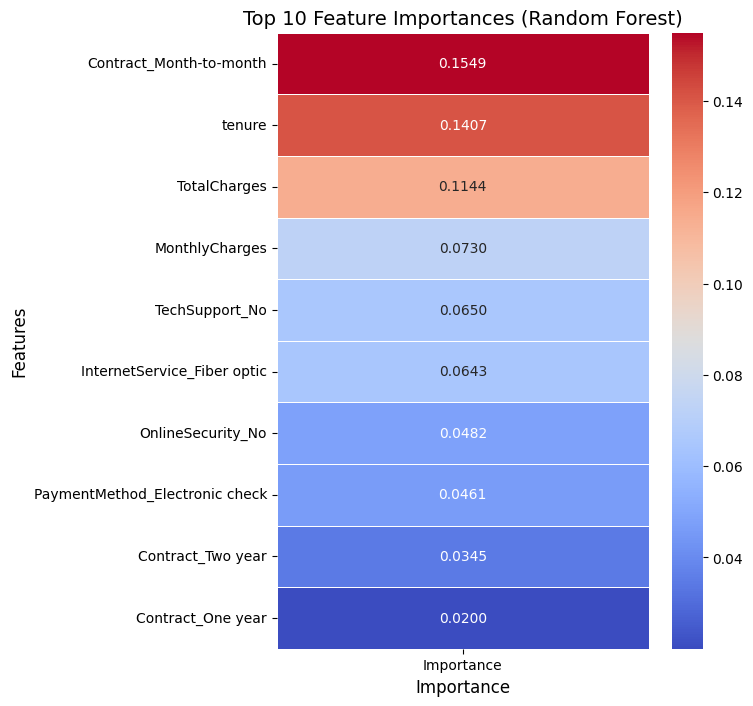

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10,criterion='gini',min_samples_leaf=10,min_samples_split=2, random_state=42)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

rf_results = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_k = 10
rf_top_features = rf_results.head(top_k)

plt.figure(figsize=(6, 8))
sns.heatmap(rf_top_features.set_index("Feature"), cmap="coolwarm", annot=True, fmt=".4f", linewidths=0.5)
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(rotation=0)  
plt.show()

## Embedded Methods | XGBoost

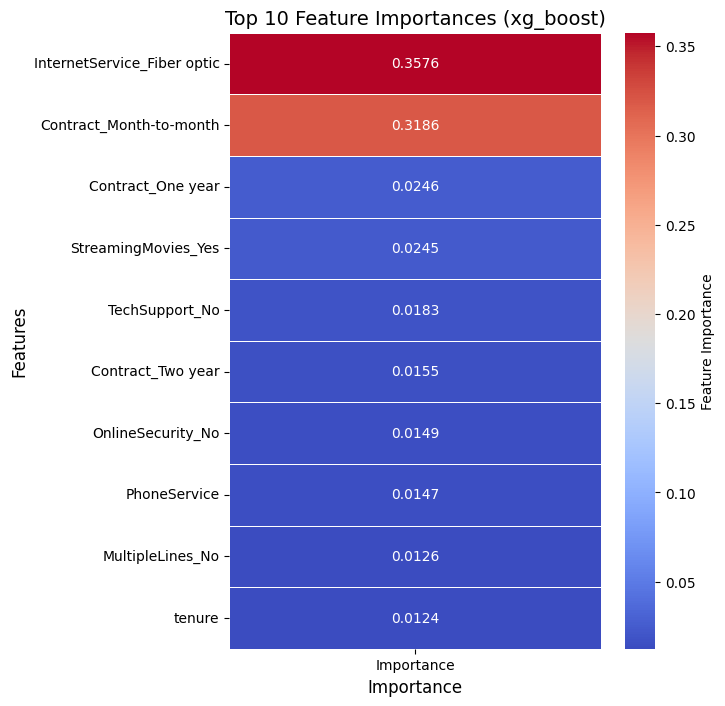

In [ ]:
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_

xg_results = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_k = 10
xg_top10_features = xg_results.head(top_k)

plt.figure(figsize=(6, 8))
sns.heatmap(xg_top10_features.set_index("Feature"), cmap="coolwarm", annot=True, fmt=".4f", linewidths=0.5,cbar_kws={'label': 'Feature Importance'})
plt.title("Top 10 Feature Importances (xg_boost)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(rotation=0) 
plt.show()


## Wrapper Methods | Recursive Feature Elimination (RFE)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


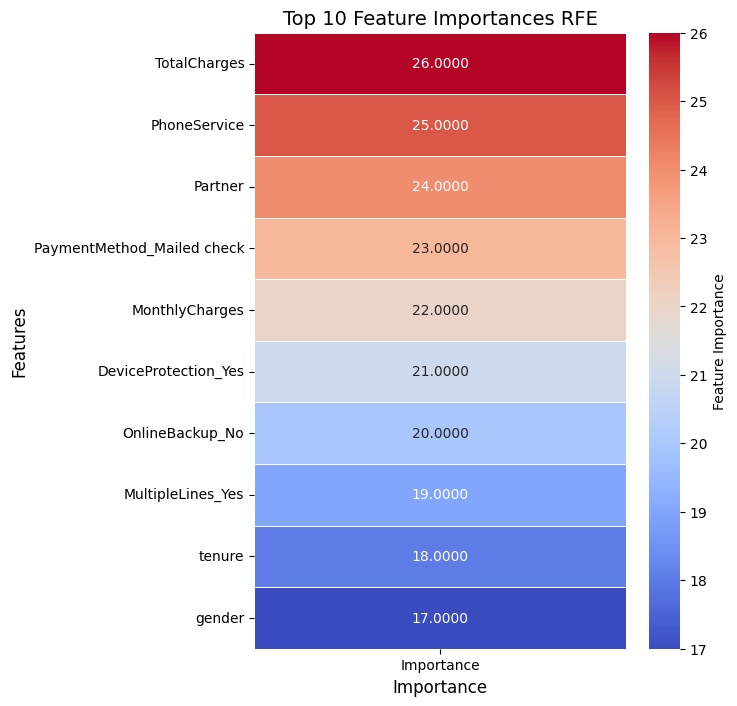

In [ ]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfe.ranking_
}).sort_values(by='Importance', ascending=False)

top_k = 10
rfe_top10_features = rfe_results.head(top_k)

plt.figure(figsize=(6, 8))
sns.heatmap(rfe_top10_features.set_index("Feature"), cmap="coolwarm", annot=True, fmt=".4f", linewidths=0.5,cbar_kws={'label': 'Feature Importance'})
plt.title("Top 10 Feature Importances RFE", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(rotation=0)  
plt.show()



## plot top 10 feature selection All

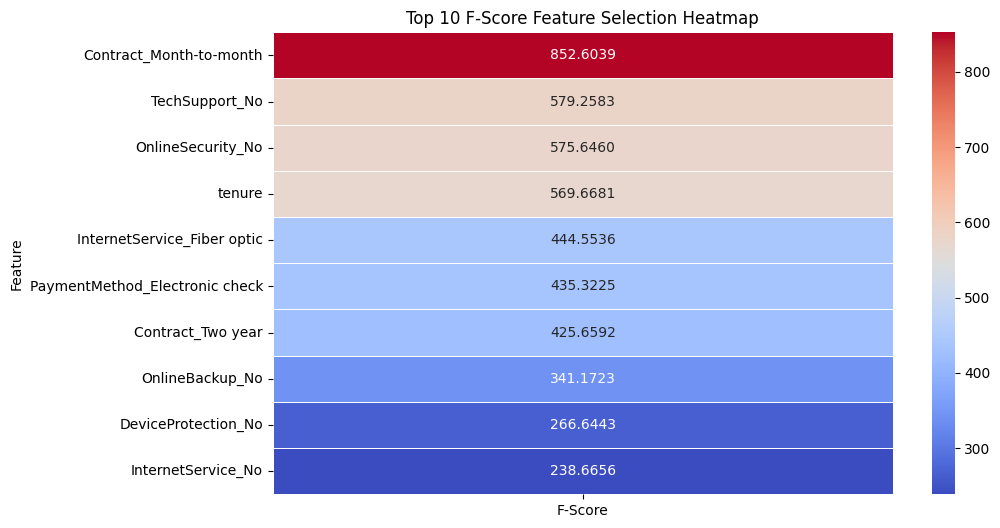

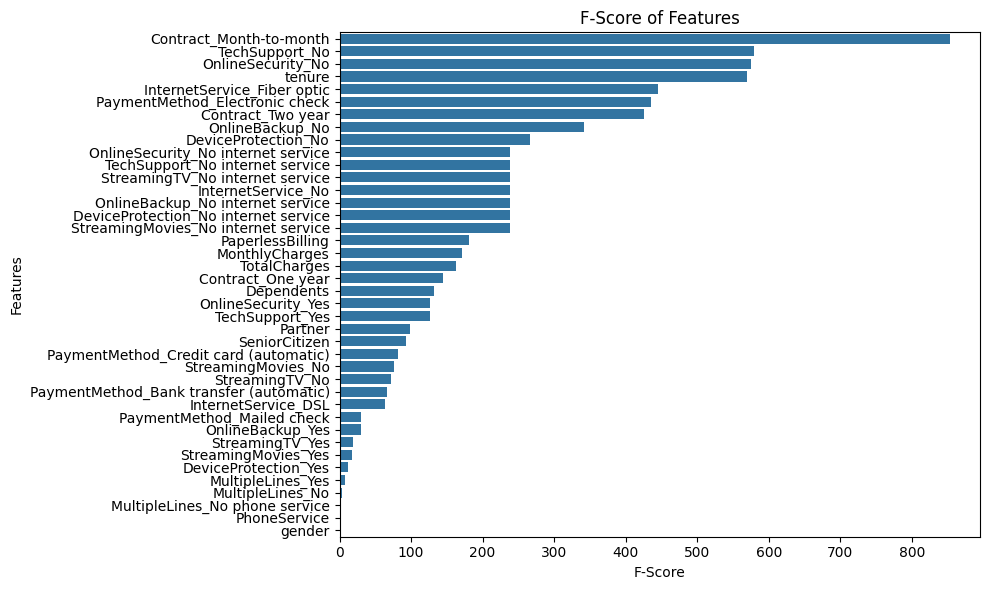

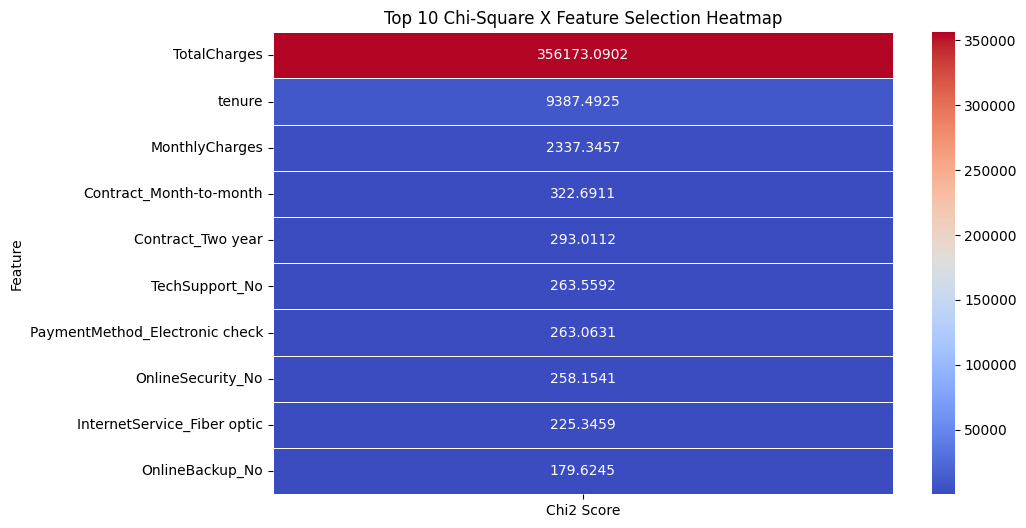

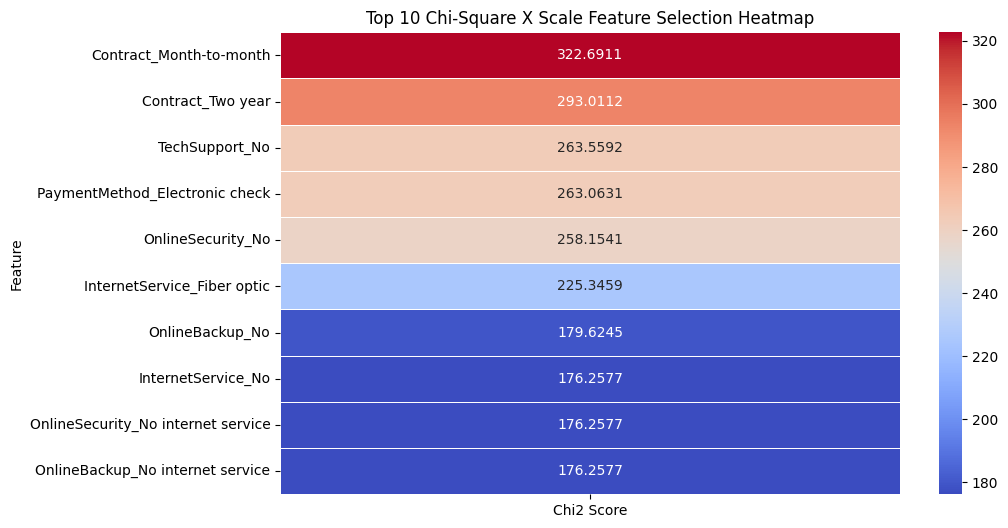

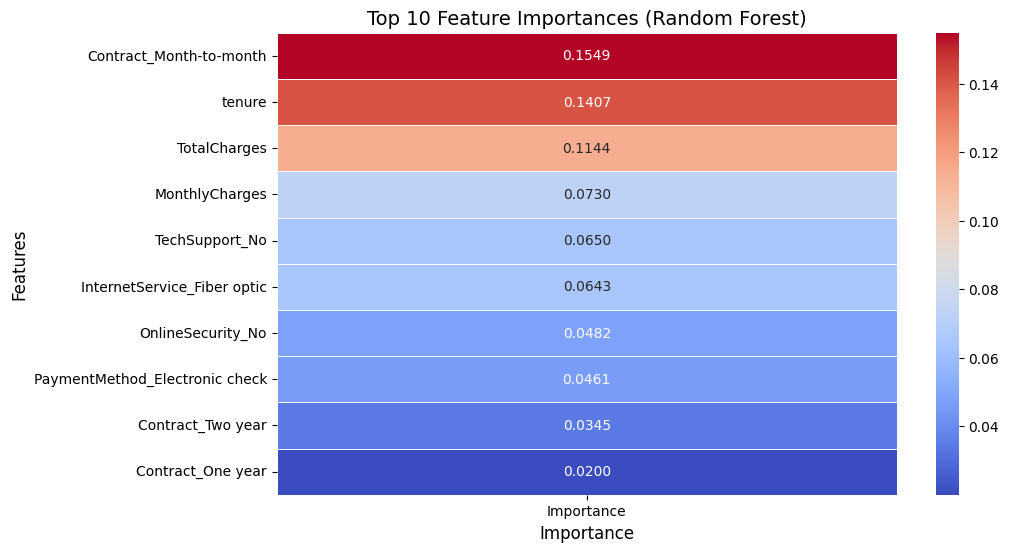

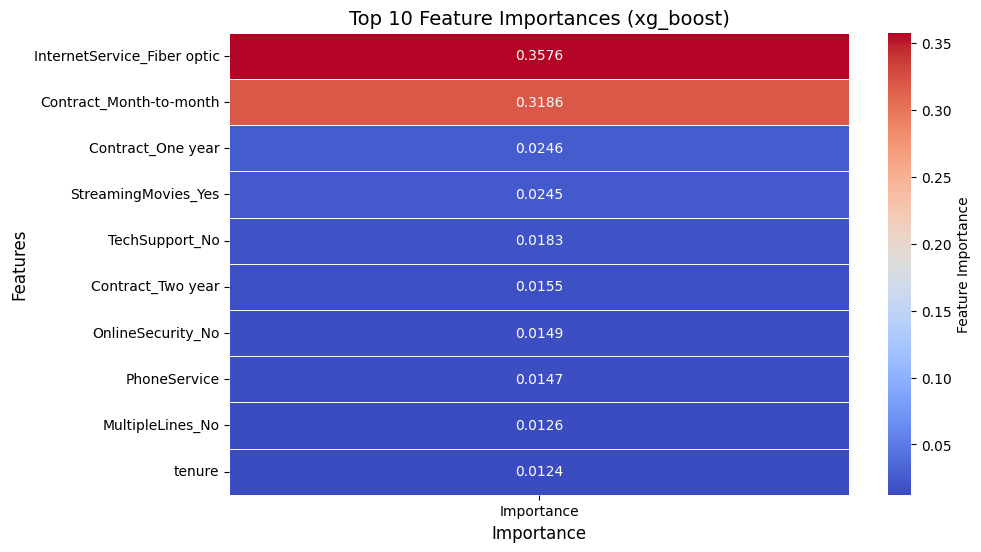

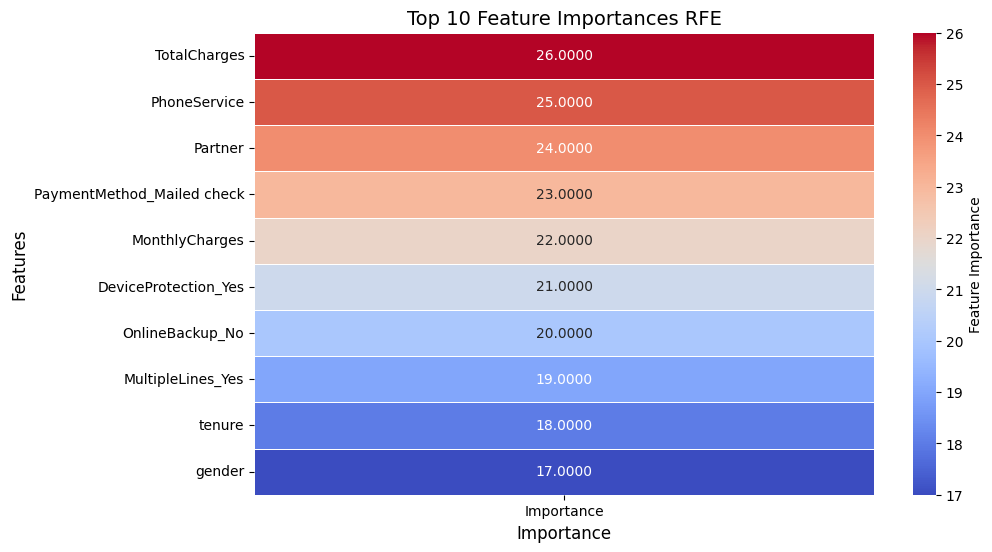

In [ ]:
# f_classif
plt.figure(figsize=(10, 6))
sns.heatmap(top_10_features[['F-Score']], annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Top 10 F-Score Feature Selection Heatmap')
plt.show()
   # f_classif Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=feature_scores.sort_values(by='F-Score', ascending=False))
plt.title('F-Score of Features')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# Chi-square test
plt.figure(figsize=(10, 6))
sns.heatmap(chi1_top_10_features[['Chi2 Score']], annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Top 10 Chi-Square X Feature Selection Heatmap')
plt.show()

  # Chi-square test x scale
plt.figure(figsize=(10, 6))
sns.heatmap(chi2_top_10_features[['Chi2 Score']], annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Top 10 Chi-Square X Scale Feature Selection Heatmap')
plt.show()


# Random forest
plt.figure(figsize=(10, 6))
sns.heatmap(rf_top_features.set_index("Feature"), cmap="coolwarm", annot=True, fmt=".4f", linewidths=0.5)
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(rotation=0)  
plt.show()


# XGBoost
plt.figure(figsize=(10, 6))
sns.heatmap(xg_top10_features.set_index("Feature"), cmap="coolwarm", annot=True, fmt=".4f", linewidths=0.5,cbar_kws={'label': 'Feature Importance'})
plt.title("Top 10 Feature Importances (xg_boost)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(rotation=0)  
plt.show()


# Recursive Feature Elimination (RFE)
plt.figure(figsize=(10, 6))
sns.heatmap(rfe_top10_features.set_index("Feature"), cmap="coolwarm", annot=True, fmt=".4f", linewidths=0.5,cbar_kws={'label': 'Feature Importance'})
plt.title("Top 10 Feature Importances RFE", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(rotation=0)  
plt.show()


# Feature Selection

In [ ]:
'Contract_Month-to-month','tenure','TotalCharges','MonthlyCharges','OnlineSecurity_No','TechSupport_No'